In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [2]:
df=pd.read_csv('german_credit-1.csv')

In [3]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
df.shape

(1000, 21)

In [6]:
#Calculating NULL accuracy
df.groupby(["default"]).count()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
default,,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


### 70% of the data has default 0 as observed from above data

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [8]:
df.describe(include="all")

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,no checking account,NaN,existing credits paid back duly till now,domestic appliances,NaN,... < 100 DM,1 <= ... < 4 years,NaN,male : single,...,NaN,"if not A121/A122 : car or other, not in attrib...",NaN,none,own,NaN,skilled employee / official,NaN,none,yes
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [9]:
df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [10]:
print('account_check_status:', df['account_check_status'].unique())
print("\n")
print('credit_history:', df['credit_history'].unique())
print("\n")
print('purpose:', df['purpose'].unique())
print("\n")
print('savings:', df['savings'].unique())
print("\n")
print('present_emp_since:', df['present_emp_since'].unique())
print("\n")
print('personal_status_sex:', df['personal_status_sex'].unique())
print("\n")
print('other_debtors:', df['other_debtors'].unique())
print("\n")
print('property:', df['property'].unique())
print("\n")
print('other_installment_plans:', df['other_installment_plans'].unique())
print("\n")
print('housing:', df['housing'].unique())
print("\n")
print('job:', df['job'].unique())
print("\n")
print('telephone:', df['telephone'].unique())



account_check_status: ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']


credit_history: ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']


purpose: ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']


savings: ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']


present_emp_since: ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']


personal_status_sex: ['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']


other_debtors: ['none' 'guarantor' 'co-applicant']


property: ['real e

In [11]:
# Mapping int values to categorial data in account check status column, I have used the below code to gain control of logic.
#For rest of columns, I will use LabelEncode as it gives me exact output I desired

df['account_check_status_mod'] = df['account_check_status'].map(
        {'< 0 DM':0,
         '0 <= ... < 200 DM':1,
         'no checking account':2 ,
         '>= 200 DM / salary assignments for at least 1 year':3 
        }
)  
df.groupby(['account_check_status', 'account_check_status_mod']).size().reset_index(name='Freq')

,account_check_status,account_check_status_mod,Freq
0,0 <= ... < 200 DM,1,269
1,< 0 DM,0,274
2,>= 200 DM / salary assignments for at least 1 ...,3,63
3,no checking account,2,394


In [12]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()



In [13]:


df["purpose_mod"]=lb_make.fit_transform(df["purpose"])

df["credit_history_mod"]=lb_make.fit_transform(df["credit_history"])

df["savings_mod"]=lb_make.fit_transform(df["savings"])

df['present_emp_since_mod']= lb_make.fit_transform(df['present_emp_since'])

df['personal_status_sex_mod']=lb_make.fit_transform(df['personal_status_sex'])

df['other_debtors_mod']= lb_make.fit_transform(df['other_debtors'])

df['property_mod'] = lb_make.fit_transform(df['property'])

df['other_installment_plans_mod'] = lb_make.fit_transform(df['other_installment_plans'])

df['housing_mod']= lb_make.fit_transform(df['housing'])

df['job_mod']= lb_make.fit_transform(df['job'])

df['telephone_mod']= lb_make.fit_transform(df['telephone'])

df['foreign_worker_mod']= lb_make.fit_transform(df['foreign_worker'])


In [14]:
print(df.groupby(['account_check_status', 'account_check_status_mod']).size().reset_index(name='Freq'))
print(df.groupby(['purpose', 'purpose_mod']).size().reset_index(name='Freq'))
print(df.groupby(['credit_history', 'credit_history_mod']).size().reset_index(name='Freq'))
print(df.groupby(['savings', 'savings_mod']).size().reset_index(name='Freq'))
print(df.groupby(['present_emp_since', 'present_emp_since_mod']).size().reset_index(name='Freq'))
print(df.groupby(['personal_status_sex', 'personal_status_sex_mod']).size().reset_index(name='Freq'))
print(df.groupby(['other_debtors', 'other_debtors_mod']).size().reset_index(name='Freq'))
print(df.groupby(['property', 'property_mod']).size().reset_index(name='Freq'))
print(df.groupby(['other_installment_plans', 'other_installment_plans_mod']).size().reset_index(name='Freq'))
print(df.groupby(['housing', 'housing_mod']).size().reset_index(name='Freq'))
print(df.groupby(['job', 'job_mod']).size().reset_index(name='Freq'))
print(df.groupby(['telephone', 'telephone_mod']).size().reset_index(name='Freq'))
print(df.groupby(['foreign_worker', 'foreign_worker_mod']).size().reset_index(name='Freq'))

                                account_check_status  \
0                                  0 <= ... < 200 DM   
1                                             < 0 DM   
2  >= 200 DM / salary assignments for at least 1 ...   
3                                no checking account   

   account_check_status_mod  Freq  
0                         1   269  
1                         0   274  
2                         3    63  
3                         2   394  
                        purpose  purpose_mod  Freq
0  (vacation - does not exist?)            0    50
1                      business            1    97
2                     car (new)            2   234
3                    car (used)            3   103
4           domestic appliances            4   280
5                     education            5    22
6           furniture/equipment            6    12
7              radio/television            7   181
8                       repairs            8    12
9                    retraini

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
account_check_status_mod,1000.0,1.246,0.927547,0.0,0.0,1.0,2.00,3.0
purpose_mod,1000.0,3.620,2.165246,0.0,2.0,4.0,4.00,9.0


In [16]:
# Print Shape of model data
df.shape

(1000, 34)

### Check for highly correlated variables but don't required any treatment for this use case

In [17]:
df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_mod,purpose_mod,...,savings_mod,present_emp_since_mod,personal_status_sex_mod,other_debtors_mod,property_mod,other_installment_plans_mod,housing_mod,job_mod,telephone_mod,foreign_worker_mod
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,-0.317294,-0.058483,...,-0.129332,0.001805,-0.089535,-0.028441,0.034011,-0.053862,0.019315,-0.032756,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.084226,-0.093921,...,0.072265,0.028078,0.099678,-0.006711,0.068363,0.003559,-0.157049,-0.215438,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.063432,-0.088610,...,0.087976,0.074224,0.114810,-0.037921,0.081618,-0.020224,-0.135632,-0.261139,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.031215,0.003199,...,-0.001663,-0.105237,0.118367,0.014835,0.025613,0.041423,-0.089405,-0.078090,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.075162,-0.017550,...,0.093577,-0.161882,0.020201,0.012690,0.107311,-0.039284,-0.011941,0.000450,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.057936,-0.128689,...,0.061369,-0.177257,0.177153,0.028294,0.166124,-0.043787,-0.301419,-0.001637,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.042741,-0.089907,...,-0.047965,-0.042033,0.112438,0.017662,-0.001222,-0.022839,-0.048591,0.004544,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.027212,-0.113761,...,0.028827,-0.052796,0.253574,0.010990,0.067663,-0.057316,-0.114508,0.127146,-0.014753,-0.077071
account_check_status_mod,-0.317294,-0.084226,-0.063432,-0.031215,-0.075162,0.057936,0.042741,-0.027212,1.000000,-0.062063,...,0.159752,-0.055781,0.028769,0.101713,0.003160,0.032338,-0.035480,-0.020985,0.049715,0.017726
purpose_mod,-0.058483,-0.093921,-0.088610,0.003199,-0.017550,-0.128689,-0.089907,-0.113761,-0.062063,1.000000,...,-0.041116,0.016664,-0.097655,-0.084020,-0.125088,0.038427,0.099185,-0.001895,-0.074844,0.029228


### Drop the original variables which are converted to dummy

In [18]:
df=df.drop(["account_check_status","credit_history","purpose","savings","present_emp_since","personal_status_sex","other_debtors","property","other_installment_plans","housing","job","telephone","foreign_worker"],axis=1)


In [19]:
df.shape

(1000, 21)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

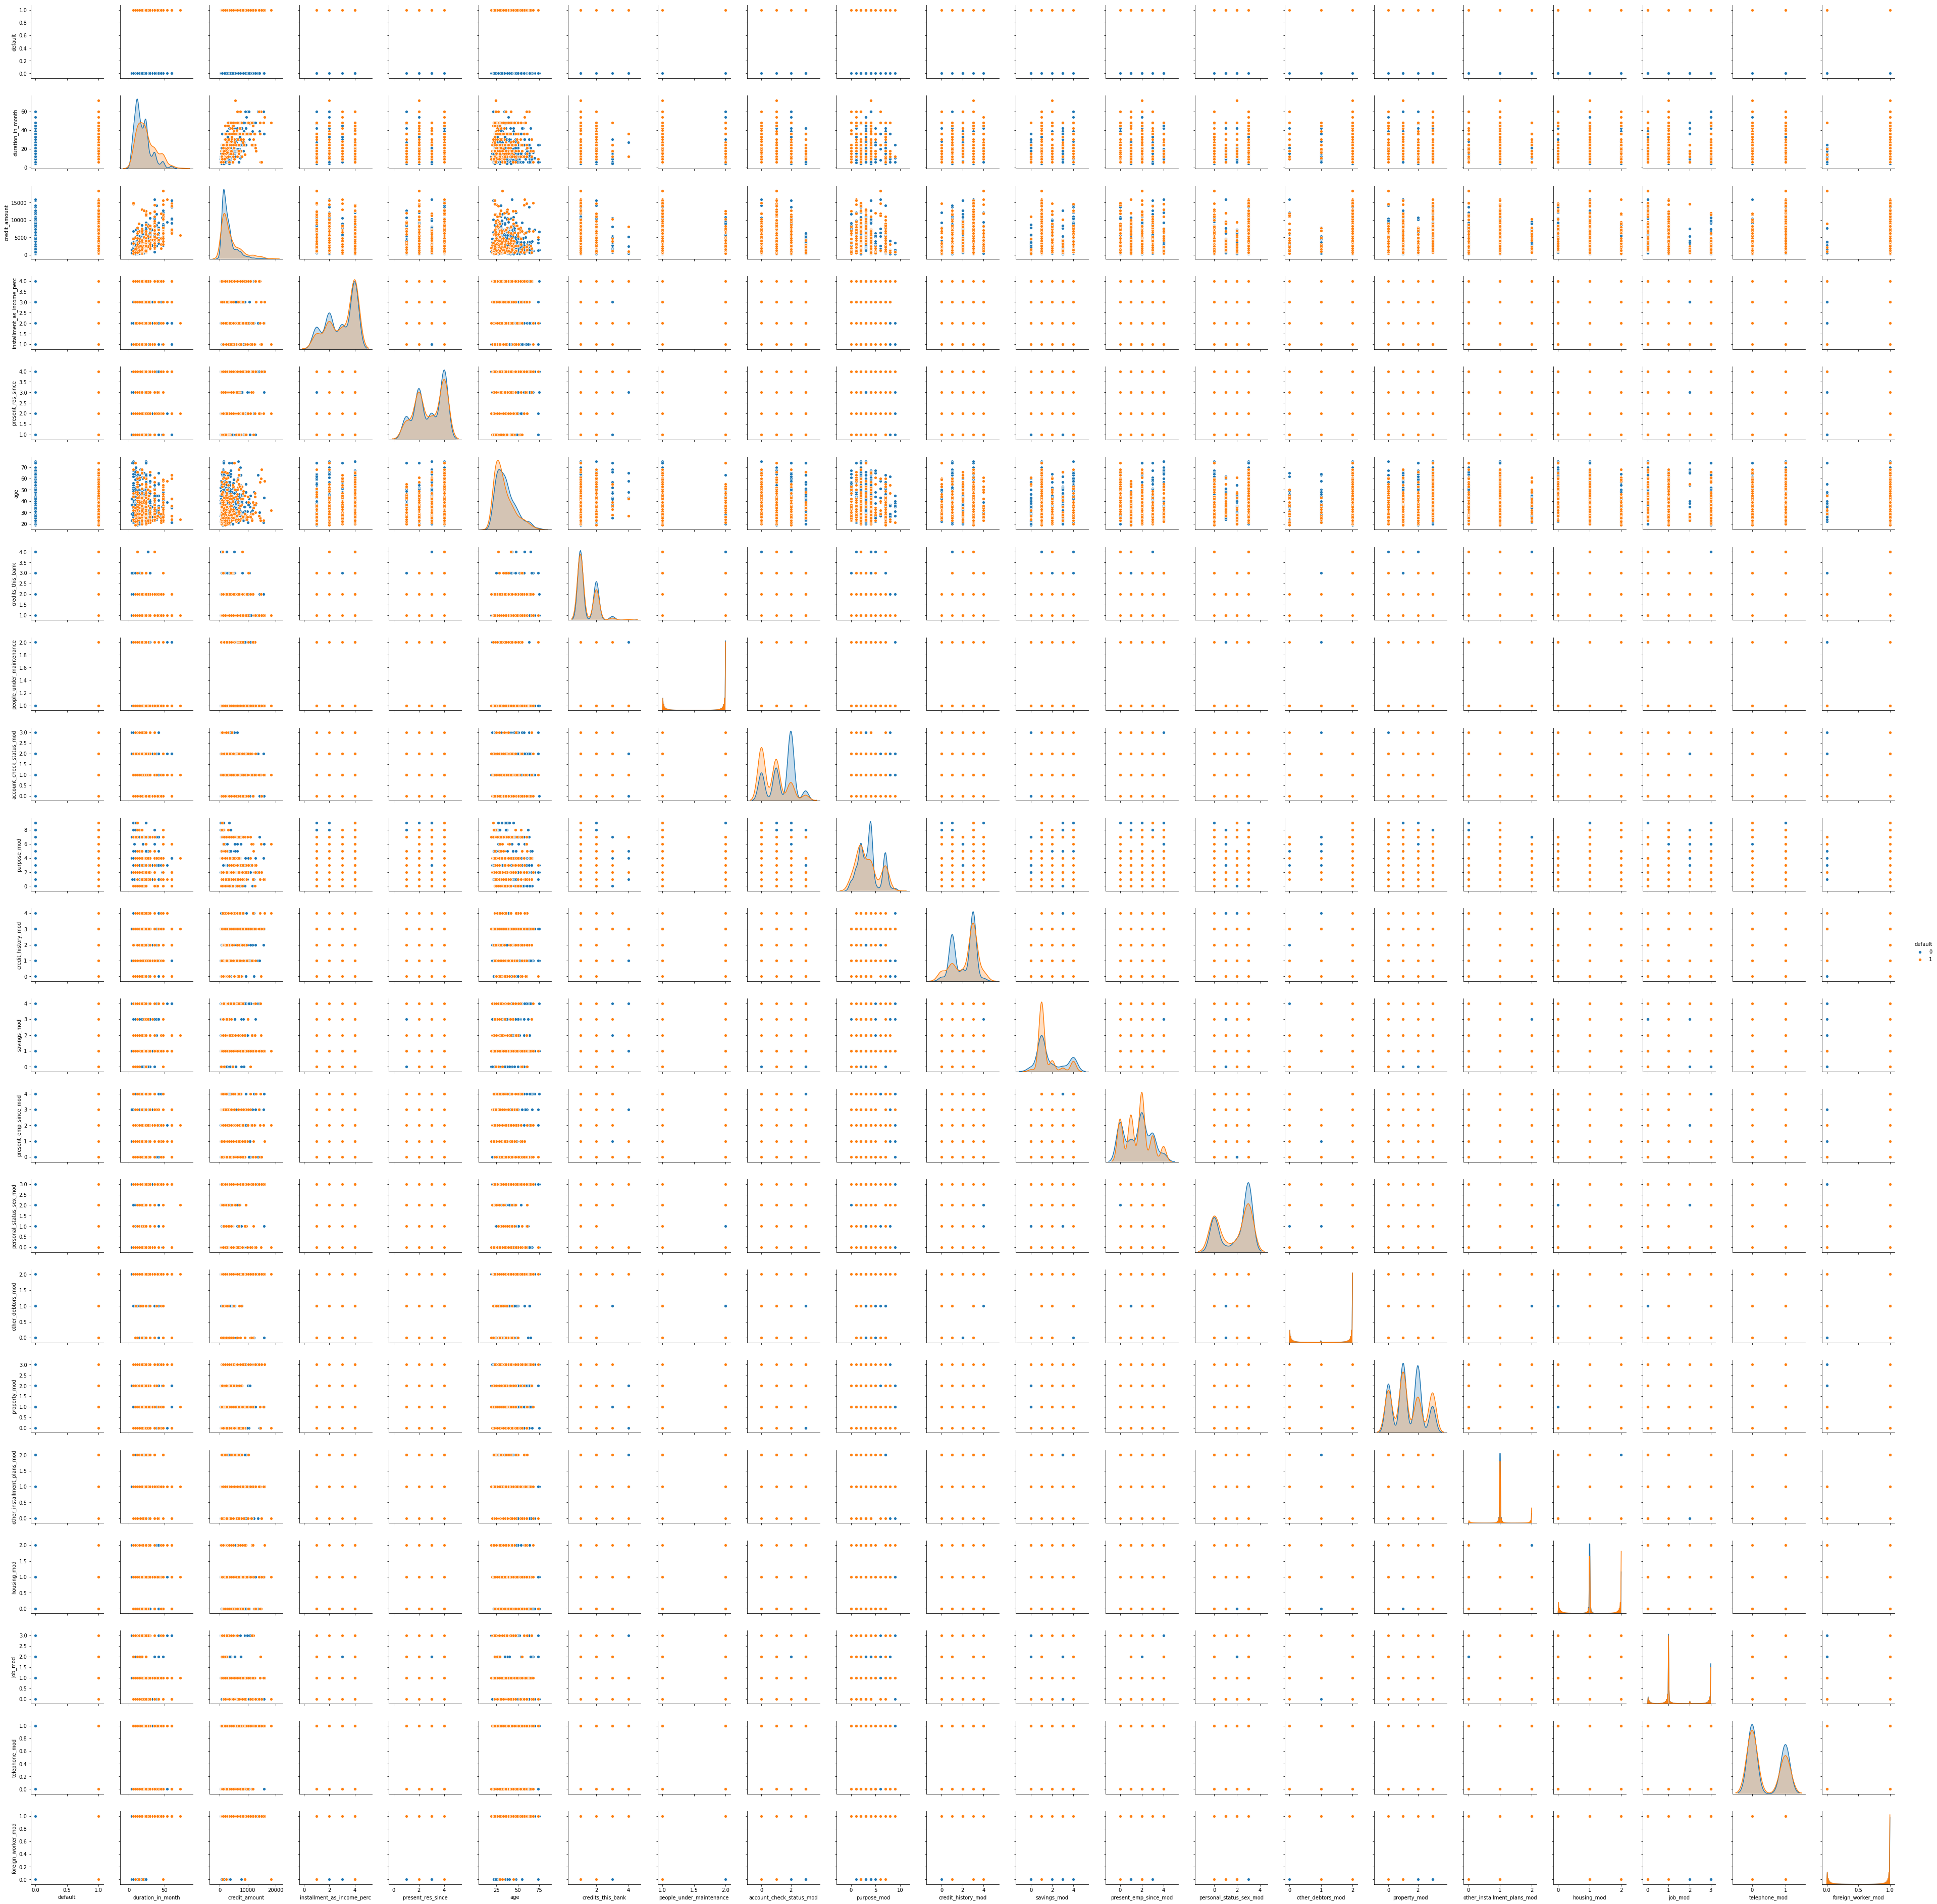

In [20]:
import seaborn as sns
sns.pairplot(df,hue="default")

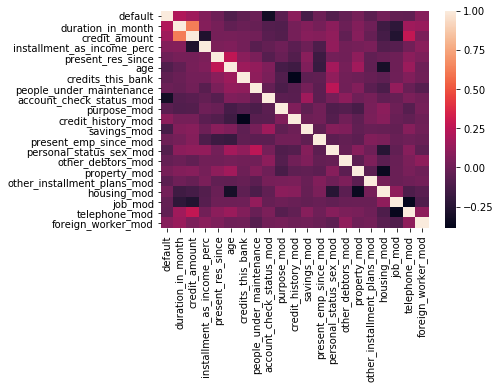

In [21]:
sns.heatmap(df.corr())

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [22]:
X=df.iloc[:,1:] # Except Default Column
Y=df.iloc[:,0] # Default column

In [23]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [24]:
from sklearn.ensemble import RandomForestClassifier 

clt=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

clt.fit(X_train,y_train)


C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [25]:

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(y_test, clt.predict(X_test)).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,196,52
Yes,18,34


In [26]:
import numpy as np
from sklearn.metrics import accuracy_score
##(test_labels, predicted)
accuracy_score(y_test,clt.predict(X_test))

0.7666666666666667

In [27]:
clt.feature_importances_

array([0.09385359, 0.13618552, 0.04518397, 0.04291137, 0.10580443,
       0.02231203, 0.01447133, 0.10047701, 0.06386269, 0.06037562,
       0.04940036, 0.05203168, 0.03438418, 0.02083931, 0.04239843,
       0.03244071, 0.02472623, 0.03326874, 0.02106277, 0.00401004])

### Q6 Show the list of the features importance( 1 Marks)

In [28]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), clt.feature_importances_), df.columns), 
             reverse=True))

Features sorted by their score:
[(0.1362, 'duration_in_month'), (0.1058, 'present_res_since'), (0.1005, 'people_under_maintenance'), (0.0939, 'default'), (0.0639, 'account_check_status_mod'), (0.0604, 'purpose_mod'), (0.052, 'savings_mod'), (0.0494, 'credit_history_mod'), (0.0452, 'credit_amount'), (0.0429, 'installment_as_income_perc'), (0.0424, 'other_debtors_mod'), (0.0344, 'present_emp_since_mod'), (0.0333, 'housing_mod'), (0.0324, 'property_mod'), (0.0247, 'other_installment_plans_mod'), (0.0223, 'age'), (0.0211, 'job_mod'), (0.0208, 'personal_status_sex_mod'), (0.0145, 'credits_this_bank'), (0.004, 'telephone_mod')]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
# Use below values
num_folds = 10
seed = 77


kfold = KFold(n_splits=20)


In [0]:
#Validate the Random Forest model build above using k fold

In [31]:
results = cross_val_score(clt, X, Y, scoring='neg_mean_squared_error', cv=kfold)

In [33]:
results

array([-0.12, -0.14, -0.32, -0.32, -0.28, -0.14, -0.26, -0.1 , -0.26,
       -0.2 , -0.28, -0.36, -0.36, -0.18, -0.2 , -0.18, -0.26, -0.24,
       -0.32, -0.22])

In [0]:
#Calculate Mean score

In [34]:
print("Mean Square Error: %.3f" % (-results.mean()))

Mean Square Error: 0.237


In [0]:
# Calculate score standard deviation using std()

In [35]:
print("Standard Deviation: %.3f" % (results.std()))

Standard Deviation: 0.076


# Q8 Print the confusion matrix( 1 Marks)

In [36]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(num_folds):
    X_, y_ = resample(X_train, y_train)
    clt.fit(X_, y_)
    y_pred = clt.predict(X_test)
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
    cm.index.name = 'Predicted'
    cm.columns.name = 'True'
    print("Confusion Matrix for Iteration: %.3f  " % i)
    print(cm)

Confusion Matrix for Iteration: 0.000  
True        No  Yes
Predicted          
No         191   58
Yes         23   28
Confusion Matrix for Iteration: 1.000  
True        No  Yes
Predicted          
No         198   53
Yes         16   33
Confusion Matrix for Iteration: 2.000  
True        No  Yes
Predicted          
No         199   63
Yes         15   23
Confusion Matrix for Iteration: 3.000  
True        No  Yes
Predicted          
No         203   58
Yes         11   28
Confusion Matrix for Iteration: 4.000  
True        No  Yes
Predicted          
No         201   56
Yes         13   30
Confusion Matrix for Iteration: 5.000  
True        No  Yes
Predicted          
No         198   56
Yes         16   30
Confusion Matrix for Iteration: 6.000  
True        No  Yes
Predicted          
No         191   51
Yes         23   35
Confusion Matrix for Iteration: 7.000  
True        No  Yes
Predicted          
No         186   46
Yes         28   40
Confusion Matrix for Iteration: 8.000  


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [37]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(num_folds):
    X_, y_ = resample(X_train, y_train)
    clt.fit(X_, y_)
    y_pred = clt.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [38]:
accuracy

[0.76,
 0.7266666666666667,
 0.7366666666666667,
 0.7533333333333333,
 0.73,
 0.7566666666666667,
 0.7566666666666667,
 0.76,
 0.7166666666666667,
 0.74]

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [64]:
#Hint: Use roc_curve

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


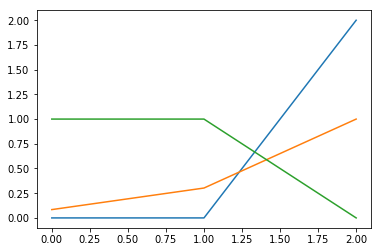

In [40]:
plt.plot(roc_curve(y_test,clt.predict(X_test)))           

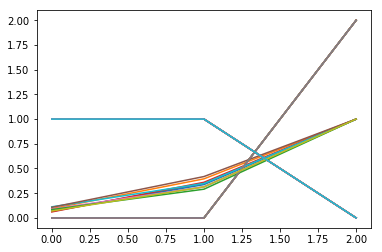

In [41]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(num_folds):
    X_, y_ = resample(X_train, y_train)
    clt.fit(X_, y_)
    y_pred = clt.predict(X_test)
    plt.plot(roc_curve(y_test,y_pred))  
    

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [62]:
print(roc_auc_score(y_test,clt.predict(X_test)))
    

0.649804390349924


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [54]:
# Number of iterations for bootstrapping
bootstrap_iteration = 50
accuracy = []
values=df.values

In [55]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

n_size = int(len(df) * 0.50)
stats = list()
for i in range(bootstrap_iteration):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    model = RandomForestClassifier()
    model.fit(train[:,:-1], train[:,-1])

    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced

    print(score)
    stats.append(score)

0.9619205298013245
0.961730449251248
0.962843295638126
0.9555189456342669
0.9591503267973857
0.9602649006622517
0.9523026315789473
0.957166392092257
0.9654605263157895
0.9591503267973857
0.9588815789473685
0.9635157545605307
0.9494290375203915
0.9565943238731218
0.9597989949748744
0.9669421487603306
0.9652317880794702
0.9642276422764228
0.9676375404530745
0.961352657004831
0.9489291598023064
0.9561688311688312
0.9632721202003339
0.9622950819672131
0.9652317880794702
0.965
0.9555921052631579
0.9608482871125612
0.9560260586319218
0.9635157545605307
0.9624796084828712
0.9536423841059603
0.9555921052631579
0.9666110183639399
0.959349593495935
0.965
0.9603305785123967
0.9538714991762768
0.9583333333333334
0.9610169491525423
0.9576547231270358
0.9703947368421053
0.9621087314662273
0.9607843137254902
0.9572368421052632
0.9551495016611296
0.9510603588907015
0.9590163934426229
0.9519071310116086
0.9666110183639399


In [56]:
accuracy = np.array(score)
print('Accuracy Score')
print('Avearge: ', score.mean())
print('Standard deviation: ', score.std())

Accuracy Score
Avearge:  0.9666110183639399
Standard deviation:  0.0


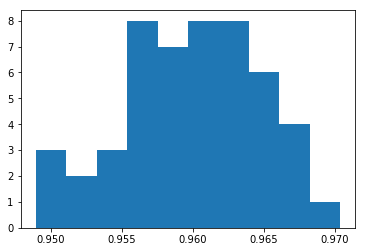

95.0 confidence interval 95.0% and 96.7%


In [57]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))